In [ ]:
############################### TASK_6-ASSMT-5-6-7   RANGANADH NARAYANAM ####################################################

In [ ]:
#ASSIGNMENT - 5   Ground Cricket Chirps
############################# ASSIGNMENT 5 #######################################################
###################### ground_cricket_data : Chirps/Second VS Ground Temperature #################

In [1]:
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline

In [ ]:
#################################### Ground Cricket Chirps #############################################

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_gc = pd.DataFrame(ground_cricket_data)

In [5]:
r_gc = linear_model.LinearRegression() 
gt = df_gc[['Ground Temperature']] 
cs = df_gc['Chirps/Second']         
r_gc.fit(gt, cs)

LinearRegression()

In [ ]:
#TASK 1

In [7]:
print('Ground cricket chirps Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(r_gc.coef_[0], r_gc.intercept_))

Ground cricket chirps Linear Regression Equation: y = 0.2030 * x + 0.4593


In [ ]:
#Task 2

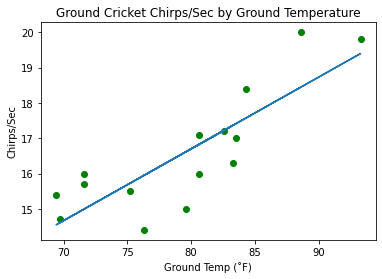

In [8]:
plt.scatter(gt, cs, color='g')
plt.plot(gt, r_gc.predict(gt))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
#Task 3

In [10]:
print('R^2 score for this linear regression equation: {:.4f}'
      .format(r_gc.score(gt, cs)))

R^2 score for this linear regression equation: 0.6923


In [11]:
if(r_gc.score(gt, cs) < 0.8):
    print(r_gc.score(gt, cs),"  :As this is below 0.8, this is not a good fit for this data")
else:
    print("yes it is a best fit")

0.6922946529146998   :As this is below 0.8, this is not a good fit for this data


In [12]:
#Task 5

In [18]:
def CHIRPSPERSEC_TO_TEMPERATURE(CPST):
    Nr = (CPST - r_gc.intercept_)
    Dr = (r_gc.coef_[0])
    R = Nr/Dr
    print("for every examination of {} chirps/sec, we can expect a ground temerature of {:0.4f} degree Foreinheat".format(CPST,R))


In [20]:
CHIRPSPERSEC_TO_TEMPERATURE(19)


for every examination of 19 chirps/sec, we can expect a ground temerature of 91.3335 degree Foreinheat


In [ ]:
################################### ASSIGNMENT - 6 #####################################################
################################### Brain vs. Body Weight ##############################################


In [21]:
import pandas as pd
df_bb = pd.read_fwf("brain_body.txt")

In [23]:
import sklearn
from sklearn import linear_model
r_bb = linear_model.LinearRegression()
body = df_bb[['Body']]
brain = df_bb['Brain']
r_bb.fit(body, brain)

LinearRegression()

In [ ]:
#################### TASK - 1 ############################################

In [26]:
print('The Linear Regression Equation for the given data: y = {:.5f} * x + ({:.5f})'
      .format(r_bb.coef_[0], r_bb.intercept_))

The Linear Regression Equation for the given data: y = 0.90291 * x + (-56.85555)


In [27]:
#################### TASK - 2 ############################################

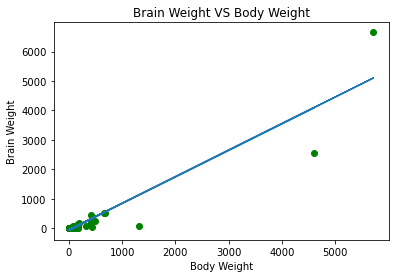

In [31]:
import matplotlib.pyplot as plt

plt.scatter(body, brain, color='g')
plt.plot(body, r_bb.predict(body))
plt.title('Brain Weight VS Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
#################### TASK - 3 ############################################

In [32]:
print('R^2 score for this linear regression equation is: {:.5f}'
      .format(r_bb.score(body, brain)))

R^2 score for this linear regression equation is: 0.87266


In [34]:
if(r_bb.score(body, brain) > 0.8):
    print("This score is greater than 0.8, so it is a best fit for the given data.")
else:
    print("its a bad fit")

This score is greater than 0.8, so it is a best fit for the given data.


In [35]:
###########     ASSIGNMENT - 7   #############################
###########     SALARY DISCRIMINATION    #############################

In [165]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [166]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [167]:
def LINEAR_REG_EQU(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    r_sd = linear_model.LinearRegression()
    r_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, r_sd.coef_, r_sd.intercept_))

In [168]:
######################### Task 1 ###############################################

In [169]:
LINEAR_REG_EQU(salary_discrim_cols, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255557


In [170]:
######################### Task 2 ###############################################

In [171]:
def LINREG_WRT_FOCUS(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [172]:
RESULT = LINREG_WRT_FOCUS(salary_discrim_cols, df_sd)


In [173]:
print('R^2 score for Regression equation using all columns: {}'
      .format(RESULT))

R^2 score for Regression equation using all columns: 0.8547180674410969


In [174]:
def COMBOS(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [175]:
import itertools as it
combos = COMBOS(salary_discrim_cols)

In [176]:
def SCORECOMBO_ALL(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[LINREG_WRT_FOCUS(list(n), df, focus)] = n
    return combo_scores

In [177]:
combo_scores = SCORECOMBO_ALL(combos, df_sd)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485595, ('Rank', 'Year', 'YSdeg')),
 (0.8455476412979361, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987165, ('Sex', 'Rank', 'Year')),
 (0.8437395200874138, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350667, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386642, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533502, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year',

In [178]:
###################### TASK 3 #######################3

In [179]:
NUM_OF_PERSONS_BY_SEX = df_sd.Sex.value_counts()
print('NUMBER OF MEN: {}\nNUMBER OF WOMEN: {}'.format(NUM_OF_PERSONS_BY_SEX[0], NUM_OF_PERSONS_BY_SEX[1]))

NUMBER OF MEN: 38
NUMBER OF WOMEN: 14


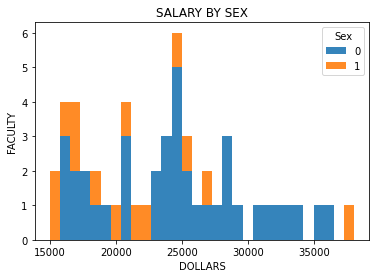

In [180]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.9, stacked=True, bins=30, title='SALARY BY SEX')
plt.xlabel('DOLLARS')
plt.ylabel('FACULTY')
plt.show()

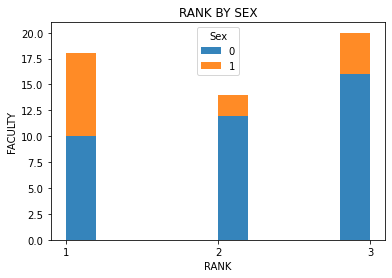

In [181]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.9, stacked=True, title='RANK BY SEX')
plt.xticks([1, 2, 3])
plt.xlabel('RANK')
plt.ylabel('FACULTY')
plt.show()

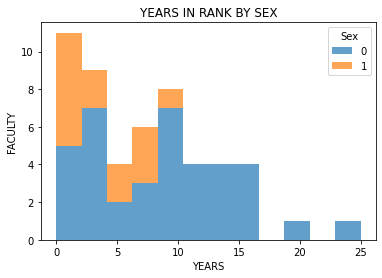

In [182]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='YEARS IN RANK BY SEX')
plt.xlabel('YEARS')
plt.ylabel('FACULTY')
plt.show()

In [183]:
################################# Comparing Men and Women with Similar Number of Years #####################


In [184]:
df_sd_10 = df_sd[df_sd['Year'] <= 10]


In [185]:
combos_10 = COMBOS(salary_discrim_cols)
combo_10_scores = SCORECOMBO_ALL(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660302, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007231, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138204, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648398, ('Rank',)),
 (0.5211388967522838, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170395, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482033, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

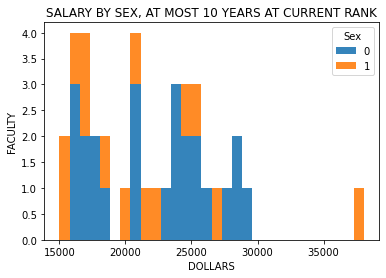

In [186]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.9, stacked=True, bins=30,
          title='SALARY BY SEX, AT MOST 10 YEARS AT CURRENT RANK')
plt.xlabel('DOLLARS')
plt.ylabel('FACULTY')
plt.show()

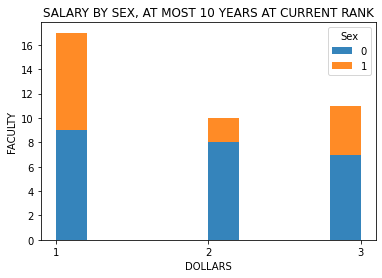

In [187]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.9, stacked=True, 
          title='SALARY BY SEX, AT MOST 10 YEARS AT CURRENT RANK')
plt.xticks([1,2,3])
plt.xlabel('DOLLARS')
plt.ylabel('FACULTY')
plt.show()

In [188]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = COMBOS(rank_discrim_cols)
combo_rank_scores = SCORECOMBO_ALL(combos_rank, df_sd_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279377, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933464, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037699, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759161, ('Sex', 'YSdeg')),
 (0.4848731472423392, ('Year', 'YSdeg')),
 (0.48257642674080237, ('YSdeg',)),
 (0.17754355818252254, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.17613062148611913, ('Year', 'Degree')),
 (0.17502353196257237, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162726713, ('Degree',))]

In [189]:
print("Task 3 Conclusion: there is no correlation with Sex. There is no salary discrimination by Sex.")

Task 3 Conclusion: there is no correlation with Sex. There is no salary discrimination by Sex.
